PyTorch has built in packages and classes, a useful class is Linear. For instantiating a linear model, we use the constructor Linear to produce an object called <code>model</code>. Then, we can use the object <code>model</code> to make a prediction.

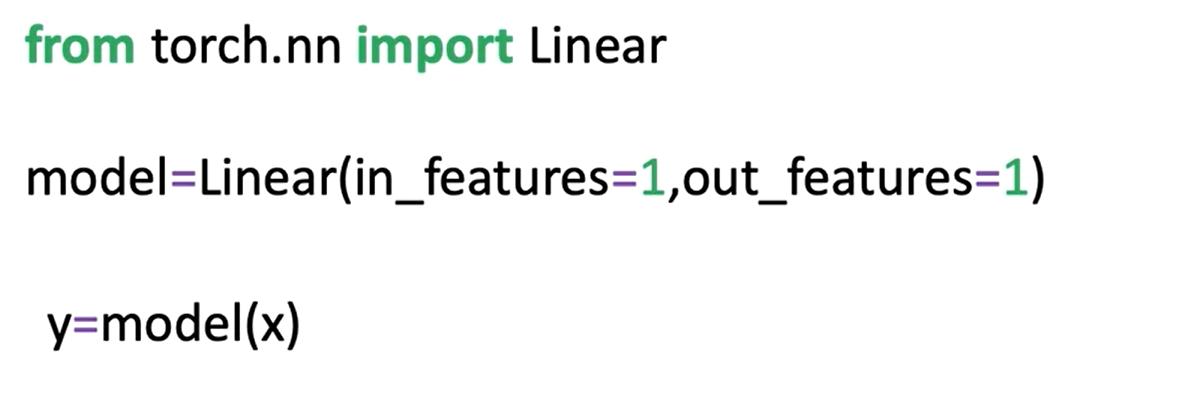

In PyTorch, it is customary to make a custom module to create a `model` using the package `nn.Module`.

We can use our custom module to wrap up multiple objects to make complex modules.

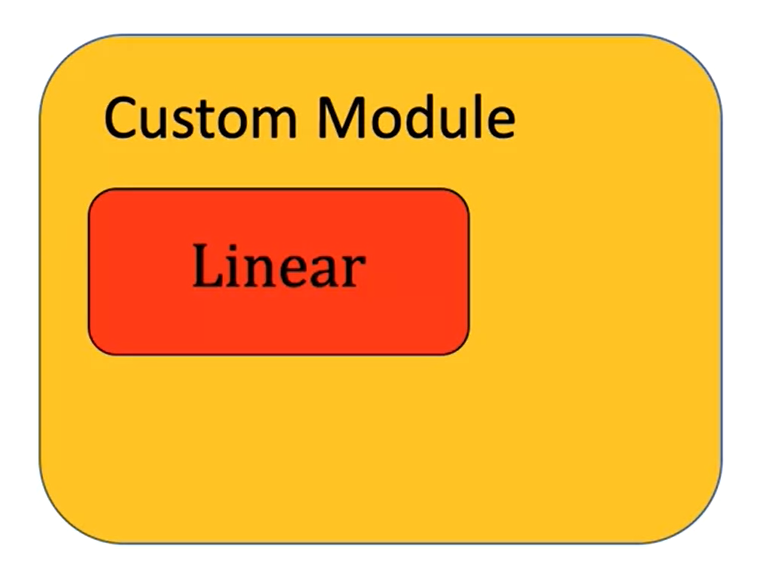

In the example, we create a custom class that uses only linear model similar to the one above in the diagram.

These custom class are the children of parent class `nn.Module`.

In [1]:
#Importing necessary modules
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import os
import math
import torch.nn as nn

In [2]:
#Creating custom class
class LR(nn.Module):
    
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

Here, we have made `LR` child of `nn.Module` so, it inherits all the methods of `nn.Module`.<br>
We initialize our constructor with input and output size.<br>
We then call the `super` constructor. This allows us to create objects from package `nn.Module` inside the object without initializing it explicitly.<br>
Now, we create an object of type `Linear`. The arguments are set via the object constructor. We then assign the object created to `self.linear`.<br>
We can now call the object of type `Linear` anywhere in the class.<br>
Function `forward()` is used to generate prediction.

In [3]:
model = LR(1, 1)

In [4]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4184]], requires_grad=True), Parameter containing:
tensor([0.2987], requires_grad=True)]


In [5]:
x = torch.tensor([1.0])
yhat = model(x)

Here, we can see that we donot need to call the `forward` function explicitly. We just need to pass the input inside parantheses of the object "`model`" as above.

In [6]:
yhat

tensor([0.7172], grad_fn=<AddBackward0>)

The custom module `LR` can also be used to predict for multiple inputs.

In [7]:
x = torch.tensor([[1.0], [2.0]])

In [8]:
yhat = model(x)

In [9]:
yhat

tensor([[0.7172],
        [1.1356]], grad_fn=<AddmmBackward0>)

#### `state_dict`

`state_dict()` is another important method. This returns a python dictionary. We will use it as our model gets more complex.

In [10]:
print('Python Dictionary :', model.state_dict())
print("Keys : ", model.state_dict().keys())
print("Values : ", model.state_dict().values())

Python Dictionary : OrderedDict([('linear.weight', tensor([[0.4184]])), ('linear.bias', tensor([0.2987]))])
Keys :  odict_keys(['linear.weight', 'linear.bias'])
Values :  odict_values([tensor([[0.4184]]), tensor([0.2987])])


### PyTorch Slope

#### Performing Gradient Descent in PyTorch (Hard Way)

Create a Pytorch Tensor and set <code>requires_grad = True</code> as we are going to learn parameters via Gadient Descent

In [11]:
w = torch.tensor(-10.0, requires_grad = True)

In [12]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)

Map the X to align with a slope of negative 3.

In [13]:
f = -3*X

Plot it.

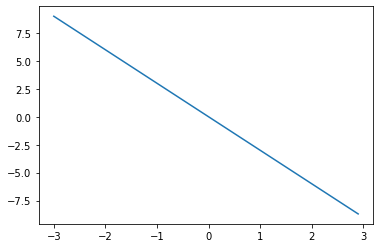

In [14]:
plt.plot(X.numpy(), f.numpy())
plt.show()

Add some random noise.

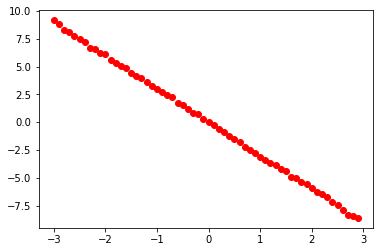

In [15]:
Y = f + 0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

Define Forward function.

In [16]:
def forward(x):
    return w*x

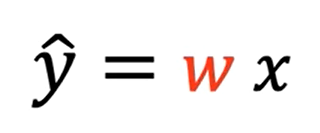

Define criterion/loss function.

In [17]:
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

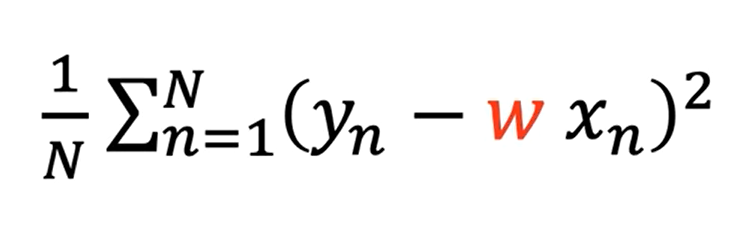

Set a learning rate of 0.1

In [18]:
lr = 0.1
COST = []
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()
    COST.append(loss.item())

In [19]:
COST

[147.27037048339844, 23.531301498413086, 3.76603627204895, 0.6088628172874451]

### Stochastic Gradient Descent using Dataloader

In [20]:
w = torch.tensor(-15.0, requires_grad = True)

In [21]:
b = torch.tensor(-10.0, requires_grad = True)

In [22]:
def forward(x):
    return w*x+b

In [23]:
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [24]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*self.x+1
        self.len = self.x.shape[0]
        
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [25]:
dataset = Data()

In [26]:
len(dataset)

60

In [27]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [28]:
cost = []
for x, y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    w.data = w.data-lr*w.grad.data
    b.data = w.data - lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    cost.append(loss.item())

In [29]:
cost

[625.0,
 216.09002685546875,
 78.97526550292969,
 23.458477020263672,
 4.130642414093018,
 1.5488150119781494,
 0.005073703825473785,
 0.25947707891464233,
 0.14568544924259186,
 0.26576685905456543,
 0.3388042151927948,
 0.477063924074173,
 0.6622127890586853,
 0.9314084649085999,
 1.3184946775436401,
 1.8797072172164917,
 2.695549249649048,
 3.883809804916382,
 5.614253044128418,
 8.12842845916748,
 11.763476371765137,
 16.97795867919922,
 24.3742733001709,
 34.70679473876953,
 48.85820388793945,
 67.75860595703125,
 92.2180404663086,
 122.64947509765625,
 158.684814453125,
 198.74081420898438,
 239.66989135742188,
 276.7101745605469,
 303.9719543457031,
 315.5936584472656,
 307.431884765625,
 278.77020263671875,
 233.25421142578125,
 178.35693359375,
 123.27810668945312,
 76.05816650390625,
 41.25836181640625,
 19.30233383178711,
 7.5784077644348145,
 2.385969638824463,
 0.5470415949821472,
 0.06755673140287399,
 8.904955757316202e-05,
 0.010020973160862923,
 0.01813916116952896,
 0

#### Optimizer

In [30]:
model = LR(1, 1)

In [31]:
from torch import nn, optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [32]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1]}]}

In [33]:
cost = []
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost.append(loss)

In [34]:
cost

[tensor(144.9242, grad_fn=<MeanBackward0>),
 tensor(87.3138, grad_fn=<MeanBackward0>),
 tensor(54.0700, grad_fn=<MeanBackward0>),
 tensor(34.3629, grad_fn=<MeanBackward0>),
 tensor(22.3778, grad_fn=<MeanBackward0>),
 tensor(14.9104, grad_fn=<MeanBackward0>),
 tensor(10.1497, grad_fn=<MeanBackward0>),
 tensor(7.0479, grad_fn=<MeanBackward0>),
 tensor(4.9849, grad_fn=<MeanBackward0>),
 tensor(3.5857, grad_fn=<MeanBackward0>),
 tensor(2.6191, grad_fn=<MeanBackward0>),
 tensor(1.9394, grad_fn=<MeanBackward0>),
 tensor(1.4536, grad_fn=<MeanBackward0>),
 tensor(1.1007, grad_fn=<MeanBackward0>),
 tensor(0.8406, grad_fn=<MeanBackward0>),
 tensor(0.6461, grad_fn=<MeanBackward0>),
 tensor(0.4988, grad_fn=<MeanBackward0>),
 tensor(0.3857, grad_fn=<MeanBackward0>),
 tensor(0.2980, grad_fn=<MeanBackward0>),
 tensor(0.2293, grad_fn=<MeanBackward0>),
 tensor(0.1750, grad_fn=<MeanBackward0>),
 tensor(0.1318, grad_fn=<MeanBackward0>),
 tensor(0.0973, grad_fn=<MeanBackward0>),
 tensor(0.0699, grad_fn=<M

### Let's train test and save model.

In [35]:
#Create a Dataset Class
class Data(Dataset):
    
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3*self.x+1
        self.y = self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [36]:
train_data = Data()

In [37]:
val_data = Data(train = False)

In [38]:
#Create a custom module for Linear Regression
class LR(nn.Module):
    
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [39]:
#Create a criterion
criterion = nn.MSELoss()

In [40]:
#DataLoader
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [41]:
epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
validation_error = torch.zeros(len(learning_rates))
test_error = torch.zeros(len(learning_rates))
MODELS = []

Let's begin the training

In [42]:
for i, learning_rate in enumerate(learning_rates):
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    #test        
    yhat = model(train_data.x)
    loss = criterion(yhat, train_data.y)
    test_error[i] = loss.item()
    #validation
    yhat = model(val_data.x)
    loss = criterion(yhat, val_data.y)
    validation_error[i] = loss.item()
    MODELS.append(model)

In [43]:
MODELS

[LR(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 LR(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 LR(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 LR(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 LR(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 )]

In [44]:
test_error

tensor([46.8093, 43.5921, 43.4475, 74.3879,     nan])

In [45]:
validation_error

tensor([11.5336, 11.5571, 10.2864,  5.7053,     nan])